In [123]:
import random
import warnings
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from itertools import combinations


warnings.filterwarnings("ignore")
import networkx as nx
from dowhy.utils import plot
from dowhy import gcm, CausalModel

import matplotlib.pyplot as plt
import json


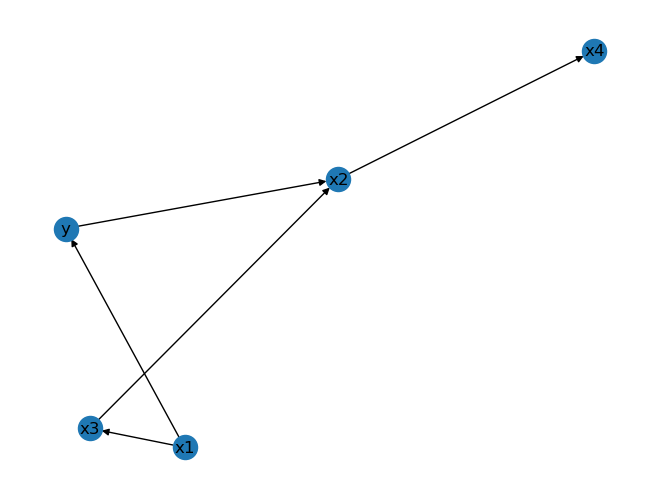

In [216]:
G = nx.DiGraph()

G.add_nodes_from(["y", "x1", "x2", "x3", "x4"])

edges = [
    # tuple of direction (from, to)
    ("y", "x2"),
    ("x1", "y"),
    ("x1", "x3"),
    ("x2", "x4"),
    ("x3", "x2"),
]


G.add_edges_from(edges)
nx.draw(G, with_labels=True)
plt.plot()

{'Y', 'X5', 'X1'}
{'Y', 'X4', 'X2'}


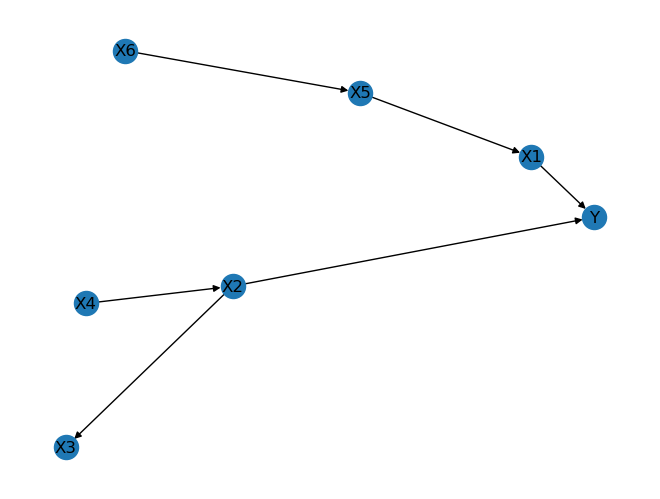

In [227]:
import networkx as nx

# Define the graph
G = nx.DiGraph()
# G.add_edges_from([('X1', 'Y'), ('X2', 'Y'), ('X3', 'X2'), ('X4', 'X2'), ('X5', 'X1'), ('X6', 'X5')])
G.add_edges_from([('X1', 'Y'), ('X2', 'Y'), ('X2', 'X3'), ('X4', 'X2'), ('X5', 'X1'), ('X6', 'X5')])

# Define all subsets including Y and its direct predecessors
subsets = []
for node in G.predecessors('Y'):
    subset = {'Y', node}
    # Add predecessors of the node if no do-intervention is performed on the node
    subset.update(G.predecessors(node))
    subsets.append(subset)

# Example output
for subset in subsets:
    print(subset)

nx.draw(G, with_labels=True)

In [251]:
edges = [('X1', 'Y'), ('X2', 'Y'), ('X2', 'X3'), ('X4', 'X2'), ('X5', 'X1'), ('X6', 'X5')]
G = nx.DiGraph(edges)

def is_valid_subset(G, subset):
    """
    Checks if a subset of nodes is valid under do-intervention rules.
    Each node in the subset must include all its predecessors from the graph.
    """
    
    # check whether the input subset is valid (must have a route to y)
    subG = G.subgraph(subset).copy()
    
    if not nx.is_connected(subG.to_undirected()):
        # print('not valid subgraph, not connected\n')
        return False
        
    # print(subset)
    for node in subset:
        # print('node:',node)
        parents = set(G.predecessors(node))
        parents_included = parents.intersection(subset)
        
        # print(parents, parents_included)
        
        if len(parents_included) != 0:
            if len(parents_included) < len(parents):
                return False
        
    return True

# Test the function with the subset ['X1', 'X2', 'Y']
subset = ['Y', 'X5', 'X1', 'X2']
print(is_valid_subset(G, subset))  # fix bug (next find the route)

True


False


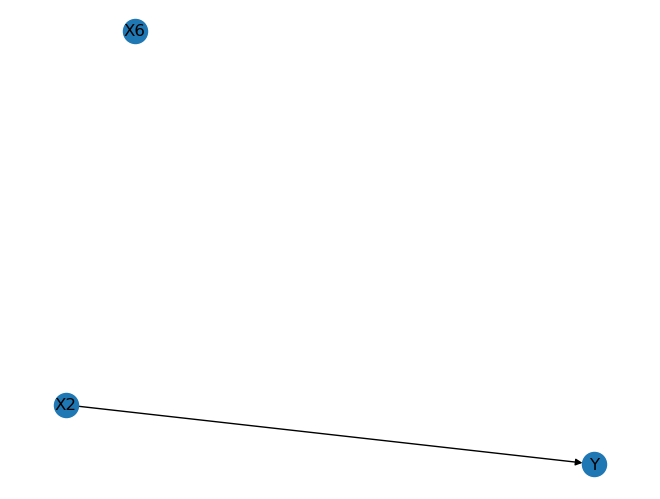

In [229]:
subset = ['X2', 'X6', 'Y']
subG = G.subgraph(subset).copy()
print(nx.is_connected(subG.to_undirected()))
nx.draw(subG, with_labels=True)

In [258]:
# combs = [*enumerate(combinations(set(G.nodes) - {'Y'}, 6))]
valid_combination = []

for r in range(1, len(G.nodes)):
    # print(r)
    for comb in combinations(set(G.nodes) - {'Y'}, r):
        # print('Combination',set(comb) | {'Y'})
        
        if is_valid_subset(G, set(comb) | {'Y'}):
            # print('valid subgraph')
            valid_combination.append(set(comb) | {'Y'})
    # break
valid_combination

[{'X1', 'X2', 'Y'},
 {'X1', 'X2', 'X3', 'Y'},
 {'X1', 'X2', 'X5', 'Y'},
 {'X1', 'X2', 'X4', 'Y'},
 {'X1', 'X2', 'X3', 'X5', 'Y'},
 {'X1', 'X2', 'X3', 'X4', 'Y'},
 {'X1', 'X2', 'X5', 'X6', 'Y'},
 {'X1', 'X2', 'X4', 'X5', 'Y'},
 {'X1', 'X2', 'X3', 'X5', 'X6', 'Y'},
 {'X1', 'X2', 'X3', 'X4', 'X5', 'Y'},
 {'X1', 'X2', 'X4', 'X5', 'X6', 'Y'},
 {'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y'}]

In [215]:
set(G.nodes) - set(['Y', 'X1', 'X2'])

{'X3', 'X4', 'X5', 'X6'}

# Dummy Graph #1

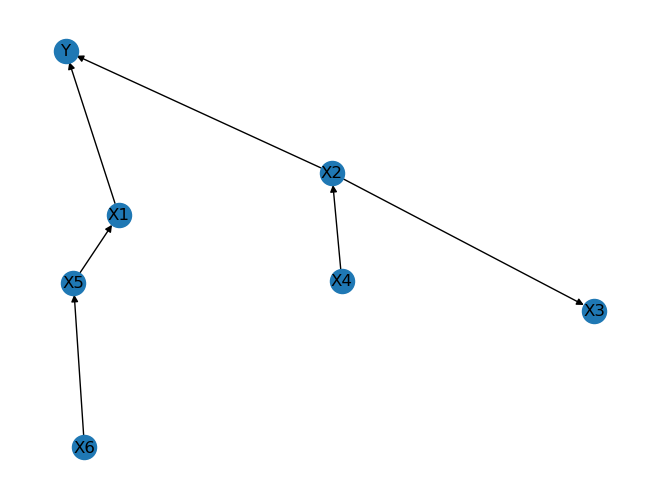

[{'X1', 'X2', 'Y'},
 {'X1', 'X2', 'X3', 'Y'},
 {'X1', 'X2', 'X5', 'Y'},
 {'X1', 'X2', 'X4', 'Y'},
 {'X1', 'X2', 'X3', 'X5', 'Y'},
 {'X1', 'X2', 'X3', 'X4', 'Y'},
 {'X1', 'X2', 'X5', 'X6', 'Y'},
 {'X1', 'X2', 'X4', 'X5', 'Y'},
 {'X1', 'X2', 'X3', 'X5', 'X6', 'Y'},
 {'X1', 'X2', 'X3', 'X4', 'X5', 'Y'},
 {'X1', 'X2', 'X4', 'X5', 'X6', 'Y'},
 {'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y'}]

In [264]:
edges = [('X1', 'Y'), ('X2', 'Y'), ('X2', 'X3'), ('X4', 'X2'), ('X5', 'X1'), ('X6', 'X5')]
G = nx.DiGraph(edges)
nx.draw(G, with_labels=True)
plt.show()
def is_valid_subset(G, subset):
    """
    Checks if a subset of nodes is valid under do-intervention rules.
    Each node in the subset must include all its predecessors from the graph.
    """
    
    # check whether the input subset is valid (must have a route to y)
    subG = G.subgraph(subset).copy()
    
    if not nx.is_connected(subG.to_undirected()):
        return False
        
        
    for node in subset:
        parents = set(G.predecessors(node))
        parents_included = parents.intersection(subset)
        if len(parents_included) != 0:
            if len(parents_included) < len(parents):
                return False
    return True
# combs = [*enumerate(combinations(set(G.nodes) - {'Y'}, 6))]
valid_combination = []

for r in range(1, len(G.nodes)):
    # print(r)
    for comb in combinations(set(G.nodes) - {'Y'}, r):
        # print('Combination',set(comb) | {'Y'})
        
        if is_valid_subset(G, set(comb) | {'Y'}):
            # print('valid subgraph')
            valid_combination.append(set(comb) | {'Y'})
    # break
is_valid_subset(G, {'X1', 'X2', 'X4', 'X5', 'X6', 'Y'})

valid_combination

# Dummy Graph #2

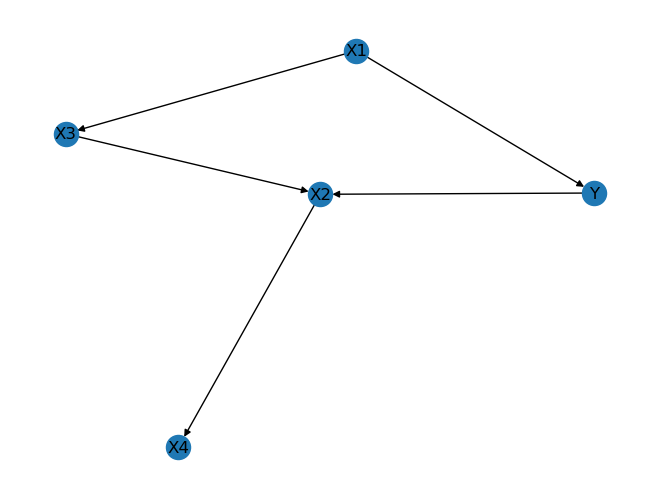

[{'X1', 'Y'},
 {'X1', 'X3', 'Y'},
 {'X2', 'X3', 'Y'},
 {'X2', 'X3', 'X4', 'Y'},
 {'X1', 'X2', 'X3', 'Y'},
 {'X1', 'X2', 'X3', 'X4', 'Y'}]

In [269]:
edges = [('X1', 'Y'), ('Y','X2'), ('X1', 'X3'), ('X3', 'X2'), ('X2', 'X4')]
G = nx.DiGraph(edges)
nx.draw(G, with_labels=True)
plt.show()
def is_valid_subset(G, subset):
    """
    Checks if a subset of nodes is valid under do-intervention rules.
    Each node in the subset must include all its predecessors from the graph.
    """
    
    # check whether the input subset is valid (must have a route to y)
    subG = G.subgraph(subset).copy()
    
    if not nx.is_connected(subG.to_undirected()):
        return False
        
        
    for node in subset:
        parents = set(G.predecessors(node))
        parents_included = parents.intersection(subset)
        if len(parents_included) != 0:
            if len(parents_included) < len(parents):
                return False
    return True
# combs = [*enumerate(combinations(set(G.nodes) - {'Y'}, 6))]
valid_combination = []

for r in range(1, len(G.nodes)):
    # print(r)
    for comb in combinations(set(G.nodes) - {'Y'}, r):
        # print('Combination',set(comb) | {'Y'})
        
        if is_valid_subset(G, set(comb) | {'Y'}):
            # print('valid subgraph')
            valid_combination.append(set(comb) | {'Y'})
    # break
# is_valid_subset(G, {'X1', 'X2', 'X4', 'X5', 'X6', 'Y'})

valid_combination